ELDEN RING WEAPONS STATS EDA

INTRODUCTION:
Elden Ring is a brand new product of FromSoftware with the guidance of Hidetaka Miyazaki and George Marin, the author of the famous fantasy series "A Song of Fire and Ice." As following the series of Soul-style, Elden Ring is an action game with an exciting open-world adventure. It has passed 12 million sales in just the first three weeks and has become one of the best games on many review pages.

THE GOAL:
There are around 300 weapons we can get in the game. With the database, we aim to analyze the Attack,Guard, and Scaling attributes.

Let's setup:

In [2]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Setup figure
sns.set_style('whitegrid')
clmap = 'flare'

In [ ]:
# Functions:


In [4]:
# Import data
df = pd.read_csv('elden_ring_weapon.csv')

In [39]:
def lst_unique(list1,srt = False):
    list_set = set(list1)
    unique_list = (list(list_set))
    if srt:
        unique_list.sort()
    return unique_list
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [42]:
def infoOut(data,details=False,vunique=False,srt=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if vunique:
        dfInfo['Unique'] = np.nan
        for i in range(0,len(data.columns)):
            Va_unique = lst_unique(data.T.values[i],srt)
            Va_listToStr = ' '.join([str(elem) for elem in Va_unique])
            dfInfo.iloc[i,3] = Va_listToStr
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

First look:

In [44]:
df.columns = df.columns.str.replace('.1','_Guard')
cl = df.columns
print('Data: ----------------------------------------------------------------\n')
display(df.head(5))
print('Index: ----------------------------------------------------------------\n')
display(cl)
print('Data Info: ----------------------------------------------------------------\n')
display(infoOut(df,vunique=True,srt=True))
print('Data Unique: ----------------------------------------------------------------\n')
for col in df.columns:
       display('{}:{}'.format(col,df[col].unique()))
       print('\n')

Data: ----------------------------------------------------------------



,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy_Guard,Mag_Guard,Fir_Guard,Lit_Guard,Hol_Guard,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


Index: ----------------------------------------------------------------



Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy_Guard', 'Mag_Guard',
       'Fir_Guard', 'Lit_Guard', 'Hol_Guard', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

Data Info: ----------------------------------------------------------------



,Column,Non-Null Count,Dtype,Unique
0,Name,307,object,Academy Glintstone Staff Alabaster Lord's Swor...
1,Type,307,object,Axe Ballista Bow Claw Colossal Sword Colossal ...
2,Phy,307,object,- 102 112 122 124 132 137 139 142 146 147 149 ...
3,Mag,307,object,- 129 137 139 147 149 156 161 166 173 175 176 ...
4,Fir,307,object,- 110 129 137 139 151 161 169 176 181 186 188 ...
5,Lit,307,object,- 129 144 154 191
6,Hol,307,object,- 105 122 151 159 161 166 169 178 183 186 188 ...
7,Cri,307,int64,100 110 115 124 130 140
8,Sta,307,int64,38 40 42 46 56 60 62 64 66 68 72 76 78 80 82 8...
9,Str,307,object,- A B C D E S


Data Unique: ----------------------------------------------------------------



'Name:[\'Academy Glintstone Staff\' "Alabaster Lord\'s Sword" \'Albinauric Bow\'\n \'Albinauric Staff\' \'Antspur Rapier\' \'Arbalest\' "Astrologer\'s Staff"\n \'Axe of Godfrey\' \'Axe of Godrick\' "Azur\'s Glintstone Staff"\n "Bandit\'s Curved Sword" "Banished Knight\'s Greatsword"\n "Banished Knight\'s Halberd" \'Bastard Sword\' "Bastard\'s Stars"\n \'Battle Axe\' \'Battle Hammer\' \'Beast-Repellent Torch\'\n \'Beastclaw Greathammer\' "Beastman\'s Cleaver" "Beastman\'s Curved Sword"\n \'Black Bow\' \'Black Knife\' \'Blade of Calling\' \'Blasphemous Blade\'\n \'Bloodhound Claws\' "Bloodhound\'s Fang" \'Bloodstained Dagger\'\n \'Bloody Helice\' \'Bolt of Gransax\' \'Brick Hammer\' \'Broadsword\'\n \'Butchering Knife\' \'Caestus\' \'Cane Sword\' \'Carian Glintblade Staff\'\n \'Carian Glintstone Staff\' "Carian Knight\'s Sword" \'Carian Regal Scepter\'\n "Celebrant\'s Cleaver" "Celebrant\'s Rib-Rake" "Celebrant\'s Sickle"\n "Celebrant\'s Skull" \'Chainlink Flail\' \'Cinquedea\' \'Cipher 

"Type:['Glintstone Staff' 'Greatsword' 'Bow' 'Thrusting Sword' 'Crossbow'\n 'Colossal Weapon' 'Greataxe' 'Curved Sword' 'Halberd' 'Flail' 'Axe'\n 'Warhammer' 'Torch' 'Curved Greatsword' 'Dagger' 'Claw'\n 'Heavy Thrusting Sword' 'Spear' 'Straight Sword' 'Fist' 'Sacred Seal'\n 'Hammer' 'Light Bow' 'Katana' 'Twinblade' 'Greatbow' 'Whip'\n 'Colossal Sword' 'Reaper' 'Ballista' 'Great Spear']"

"Phy:['43' '313' '200' '29' '240' '308' '404' '347' '58' '289' '306' '338'\n '159' '301' '320' '142' '284' '350' '276' '171' '161' '173' '296' '230'\n '345' '198' '298' '286' '328' '220' '235' '38' '215' '291' '267' '193'\n '-' '54' '242' '249' '196' '252' '238' '357' '269' '75' '259' '279' '355'\n '181' '274' '66' '61' '294' '330' '225' '416' '188' '176' '164' '98'\n '147' '262' '367' '213' '316' '303' '247' '175' '245' '325' '50' '382'\n '122' '379' '323' '139' '311' '208' '210' '318' '387' '396' '218' '352'\n '377' '183' '369' '401' '281' '340' '600' '151' '288' '271' '365' '672'\n '237' '260' '333' '257' '166' '178' '254' '146' '203' '186' '227' '102'\n '360' '137' '264' '222' '124' '149' '132' '374' '112']"

"Mag:['-' '93' '191' '215' '156' '58' '129' '80' '166' '240' '88' '208' '137'\n '175' '220' '247' '73' '147' '230' '173' '149' '176' '213' '186' '139'\n '75' '161' '328' '90' '203' '78' '196']"

"Fir:['-' '254' '191' '240' '169' '176' '129' '188' '139' '161' '151' '181'\n '186' '222' '267' '137' '237' '75' '110']"

"Lit:['-' '154' '191' '144' '129']"

"Hol:['-' '183' '159' '105' '208' '161' '188' '191' '151' '122' '36' '294'\n '237' '301' '298' '213' '252' '186' '240' '200' '166' '169' '245' '220'\n '178' '193' '254']"

'Cri:[100 110 130 115 124 140]'

'Sta:[ 40 126  60  38  62  68 150  42  98 132 122 106 112 194  94 182 164  56\n 138  78  88 218 100  86  90  80  66 102  76 136 190  64 156  46  84 116\n 154 202 172 180 118 152 184 104 224 128 120 134 160 200 168 114  72  92\n 110 140  96  82 210 108 124 146 130]'

"Str:['D' 'B' 'E' '-' 'C' 'A' 'S']"

"Dex:['-' 'D' 'C' 'E' 'B']"

"Int:['S' 'D' '-' 'B' 'C' 'A' 'E']"

"Fai:['-' 'D' 'C' 'B' 'A' 'S']"

"Arc:['-' 'S' 'B' 'C' 'D']"

"Any:['-' '(55)' '(60)' '(38)' '(50)' '(65)' '(70)' '(45)' '(75)' '(66)' '(72)']"

"Phy_Guard:['25' '56' '-' '23' '47' '75' '65' '48' '68' '55' '32' '62' '81' '44' '26'\n '31' '72' '38' '36' '57' '60' '74' '58' '35' '41' '40' '63' '43' '9' '49'\n '51' '13' '64' '71' '52' '28' '45' '54' '66' '46' '78' '33' '70' '42'\n '37' '61' '73' '21' '24' '88' '80' '27' '69' '84' '59' '30' '50' '53'\n '82' '39' '76' '67']"

"Mag_Guard:['15' '33' '-' '14' '31' '45' '35' '36' '48' '17' '43' '18' '39' '22' '21'\n '40' '20' '27' '52' '25' '34' '28' '38' '41' '37' '32' '44' '30' '63'\n '42' '47' '23' '26' '55' '24' '12' '50' '29' '60' '49' '10' '57' '19'\n '56' '46' '16']"

"Fir_Guard:['15' '27' '-' '14' '31' '45' '35' '36' '24' '28' '33' '43' '18' '54' '22'\n '21' '40' '20' '26' '25' '34' '17' '41' '51' '32' '30' '37' '47' '38'\n '42' '13' '52' '49' '48' '44' '50' '29' '39' '19' '23' '46' '16']"

"Lit_Guard:['15' '27' '-' '14' '31' '45' '35' '36' '24' '17' '33' '43' '18' '39' '22'\n '21' '40' '47' '20' '26' '25' '34' '28' '41' '37' '32' '30' '52' '50'\n '46' '23' '38' '42' '13' '12' '48' '29' '10' '49' '19' '44' '16']"

"Hol_Guard:['15' '27' '-' '14' '31' '45' '35' '36' '24' '17' '43' '33' '42' '30' '39'\n '22' '21' '40' '20' '26' '25' '34' '28' '61' '38' '58' '41' '37' '32'\n '18' '47' '50' '23' '55' '54' '59' '72' '66' '13' '12' '52' '56' '60'\n '48' '10' '49' '44' '29' '19' '57' '46' '16']"

"Bst:['15' '39' '-' '14' '25' '50' '42' '36' '52' '20' '37' '22' '62' '32' '26'\n '44' '18' '34' '40' '57' '24' '31' '48' '28' '19' '27' '33' '21' '49'\n '46' '17' '47' '30' '55' '60' '38' '69' '45' '53' '56' '54' '67' '43'\n '35' '66' '16' '51' '61' '23']"

"Rst:['10' '19' '-' '9' '25' '20' '12' '21' '15' '14' '11' '24' '17' '23' '18'\n '13' '16' '26' '22' '29' '28' '27']"

'Wgt:[ 3.   8.   4.5  2.5  6.  18.  11.   4.   5.  10.   9.   5.5 16.5  2.\n  1.5 13.5 11.5  8.5 12.5  3.5  0.   6.5 16.  10.5 20.  19.5  9.5 15.\n 21.5 12.  19.  26.5  7.  17.5 14.5 21.  17.  13.  23.   7.5 22.  23.5\n 15.5]'

"Upgrade:['Smithing Stones' 'Somber Smithing Stones']"

In [11]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Percentage of null: ----------------------------------


,Name,Percent
0,Name,0.000000
1,Type,0.000000
2,Phy,0.651466
3,Mag,87.947883
4,Fir,93.159609
5,Lit,98.697068
6,Hol,89.576547
7,Cri,0.000000
8,Sta,0.000000
9,Str,5.211726


Heatmap of null: ----------------------------------


Text(0.5, 1.0, 'Heatmap of null values')

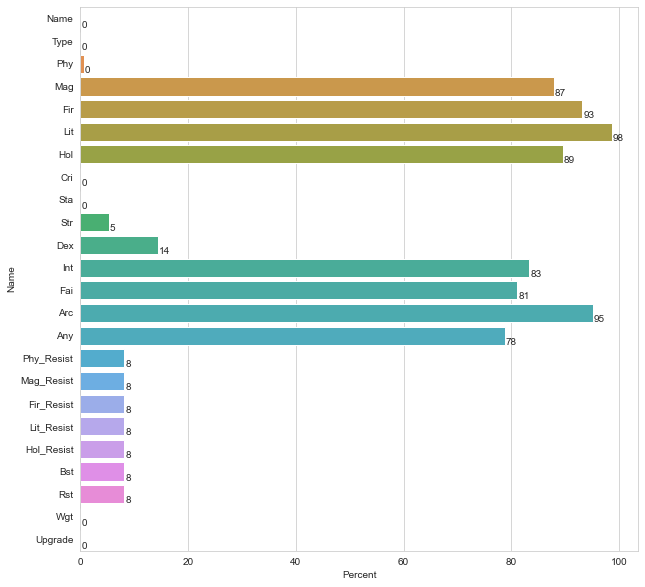

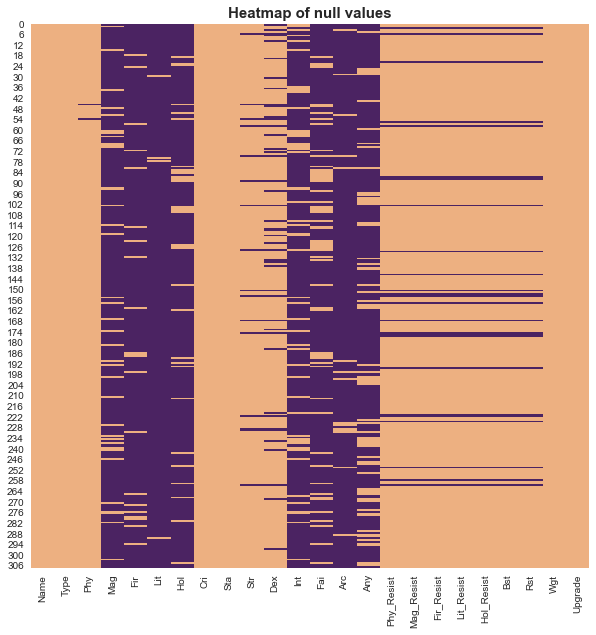

In [14]:
for col in df.columns:
    df[col].replace({'-':np.nan},inplace=True)
print('Percentage of null: ----------------------------------')
null_per = df.isnull().sum()*100/len(df)
null_per = null_per.to_frame()
null_per.columns = ['Percent']
null_per.index.names = ['Name']
null_per.reset_index(inplace=True)
display(null_per)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Percent',y='Name',data=null_per)
show_values_on_bars(axs=ax,h_v='h',space = 0.2)
print('Heatmap of null: ----------------------------------')
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap=clmap)
plt.title('Heatmap of null values',fontsize=15,fontweight='bold')

In [15]:
df[df['Phy'].isnull()]

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy_Resist,Mag_Resist,Fir_Resist,Lit_Resist,Hol_Resist,Bst,Rst,Wgt,Upgrade
45,Cipher Pata,Fist,NaN,NaN,NaN,NaN,208,100,90,NaN,...,NaN,9,14,14,14,61,19,9,0.0,Somber Smithing Stones
53,Coded Sword,Straight Sword,NaN,NaN,NaN,NaN,208,100,76,NaN,...,NaN,13,22,22,22,58,27,13,2.5,Somber Smithing Stones


In [16]:
cols = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta','Phy_Resist', 'Mag_Resist',
       'Fir_Resist', 'Lit_Resist', 'Hol_Resist', 'Bst', 'Rst']
for col in cols:
        df[col].fillna(0,inplace=True)

In [17]:
for col in cols:
    df[col] = df[col].astype('str').astype('int')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        307 non-null    object 
 1   Type        307 non-null    object 
 2   Phy         307 non-null    int32  
 3   Mag         307 non-null    int32  
 4   Fir         307 non-null    int32  
 5   Lit         307 non-null    int32  
 6   Hol         307 non-null    int32  
 7   Cri         307 non-null    int32  
 8   Sta         307 non-null    int32  
 9   Str         291 non-null    object 
 10  Dex         263 non-null    object 
 11  Int         51 non-null     object 
 12  Fai         58 non-null     object 
 13  Arc         15 non-null     object 
 14  Any         65 non-null     object 
 15  Phy_Resist  307 non-null    int32  
 16  Mag_Resist  307 non-null    int32  
 17  Fir_Resist  307 non-null    int32  
 18  Lit_Resist  307 non-null    int32  
 19  Hol_Resist  307 non-null    i

None

<AxesSubplot:>

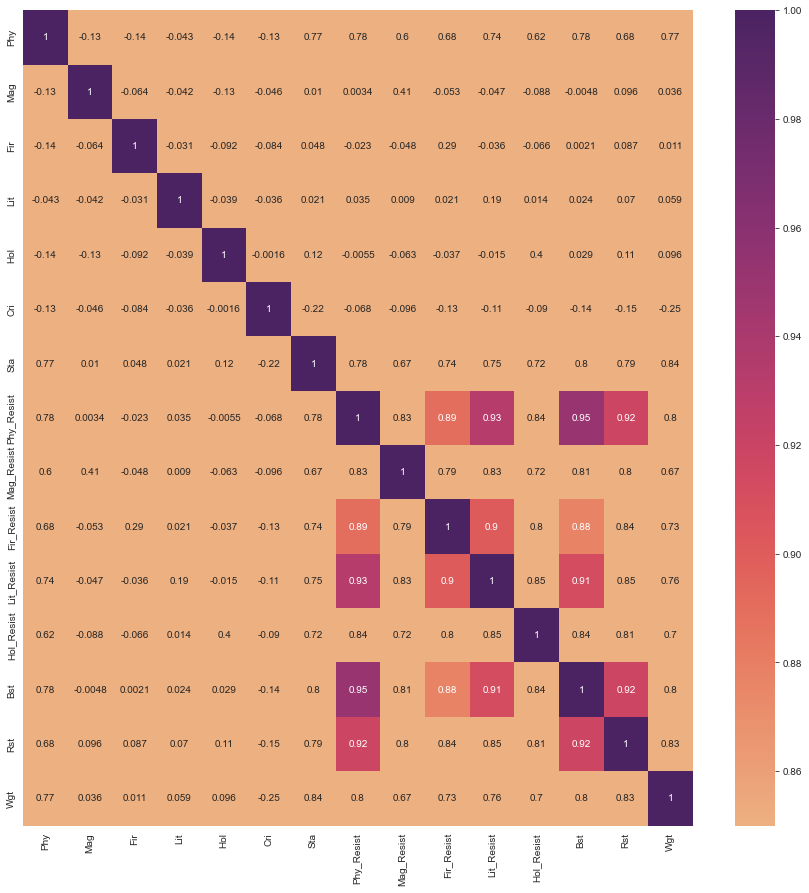

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'),cbar=True,cmap=clmap,annot=True,vmin=0.85,vmax=1)

<AxesSubplot:title={'center':'Twinblade'}>

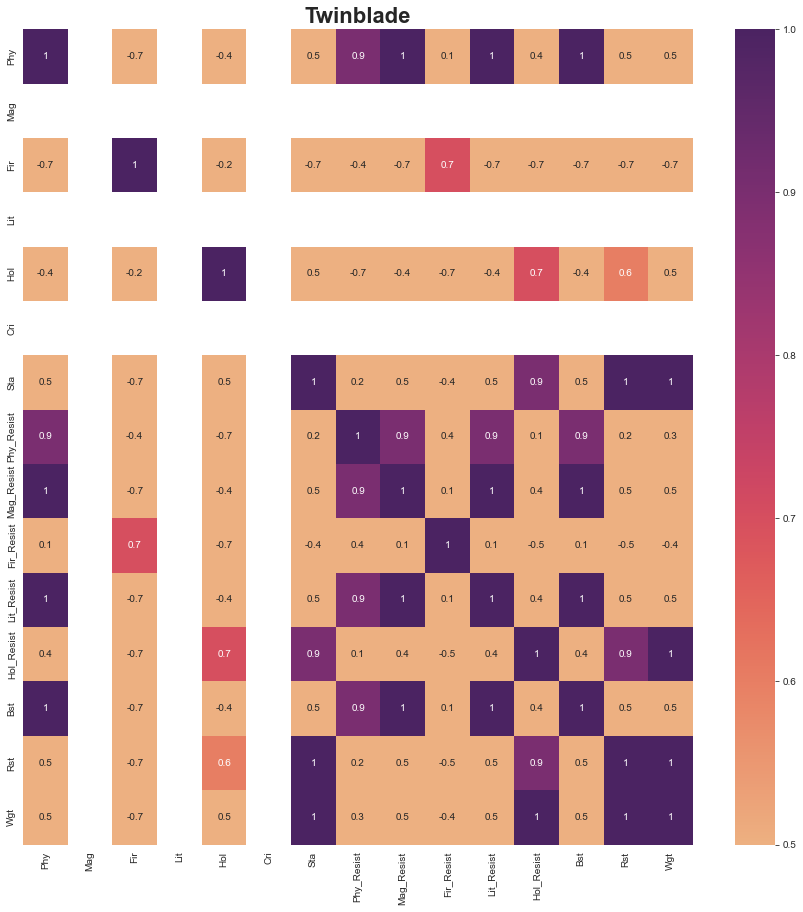

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
plt.title("Twinblade",size = 22,weight = 'bold')
da = df[df['Type']=='Twinblade'].iloc[:,:]
sns.heatmap(da.corr(method='spearman').round(1),cbar=True,cmap=clmap,annot=True,vmin=0.5,vmax=1)